Credit for this notebood belongs to @pouryaayria on Kaggle. I reproduced their work to learn from the pros!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# A complete Machine Learning PipeLine

- Intoroduction to supervised Machine Learning
    - What is machine learning?
    - Types of Machine learning Algorithms
    - Supervised Machine Learning
    - Classification vs Regression
    - Machine Learning Pipeline
    
    
- Predict the onset of diabetes based on diagnostic measures

    - Data Preparing
        - Analyze Data
        - Descriptive Statitics
        - Data Visualization
        
        
    - Outliers investigation
        - Outliers investigation Single Feature
        - Outliers investigation Pairs
        
        
    - Evaluate Algorithms: Baseline
    - Feature Engineering 
        - Data Preprocessig
            - Standard Scaler
            - MinMax Scaler
        - Remove OutlierS
    - Feature Selection
        - Corrolation
        - Feature Importance
    - Ensemble Methods    
        - Algortithm Tuning
        - Voting Ensemble
        - Error Corrolation
        - Stacking
 
 -  Conclusion (Acuuracy 86%)
    
    


# Intoroduction to supervised Machine Learning:

## What is machine learning?
Task **T**: image classification problem of classifying dogs and cats 

Experience **E**: I would give a ML algorithm a
bunch of images of dogs and cats

The performance measure **P**: the ML algorithm could learn
how to distinguish a new image as being either a dog or cat.

Machine learning (Machine Learning by Tom Mitchell):

**A computer program is said to learn from experience **E** with
respect to some class of tasks **T** and performance measure **P**,
if its performance at tasks in **T**, as measured by **P**, Improves
with experience **E**.**

## Types of Machine learning Algorithms

1. Supervised Learning: Input data is called training data and
has a known label or result.
Ex: Spam/not-spam or a stock price at a time.

2. Unsupervised Learning: Input data is not labeled and does
not have a known result.
EX: Grouping customers by purchasing behavior

3. Semi-Supervised Learning: Input data is a mixture of labeled and
unlabeled examples.
EX: a photo archive where only some of the
images are labeled, (e.g. dog, cat, person) and the majority are
unlabeled.

4. Reinforcement Learning: a goal-oriented learning based
on interaction with environment. Autonomous cars.

## Supervised Machine Learning
1. Regression: Linear Regression, Logistic Regression

2. Instance-based Algorithms: k-Nearest Neighbor (KNN)

3. Decision Tree Algorithms: CART

4. Bayesian Algorithms: Naive Bayes

5. Ensemble Algorithms: eXtreme Gradient Boosting

6. Deep Learning Algorithms: Convolution Neural Network

## Classification vs Regression
**Classification** predicting a label .vs. **Regression** predicting a quantity.

## Classification Algorithms Examples:
- Linear: Linear Regression, Logistic Regression
- Nonlinear: Trees, k-Nearest Neighbors
- Ensemble:
    - Bagging: Random Forest
    - Boosting:  AdaBoost


## Machine Learning Pipeline:

- Define Problem
    - ML type of problem


- Prepare Data
    - Data Visualization methos ...
    - Data Selection
    - Feature Selection methods ..
    - Feature Engineering methods ..
    - Data Transormation methods ..


- Spot Check Algorithm
    - Test Harness ...
    - Perform Measure ...
    - Evaluate accuracy of different algorithms


- Improve Results 
    - Algorithms Turning methids
    - ensemble methods


- Present Results
    - Save the model

# Define Problem:
## Pima Indians Diabetes Database
### Predict the onset of diabetes based on diagnostic measures

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Attribute Information:**

1. Number of times pregnant 

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

3. Diastolic blood pressure (mm Hg) 

4. Triceps skin fold thickness (mm) 

5. 2-Hour serum insulin (mu U/ml) 

6. Body mass index (weight in kg/(height in m)^2) 

7. Diabetes pedigree function 

8. Age (years) 

9. Class variable (0 or 1)

In [2]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# 2. Data Preparing 

In [4]:
# Loading Data
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The data is not included time or object
- There is no null value in data set

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### 2.2. Data Visualization
Let's take a look at our data in the most raw shape.
I really recommend scatter plot because we can get the idea of our data without any manipulation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/

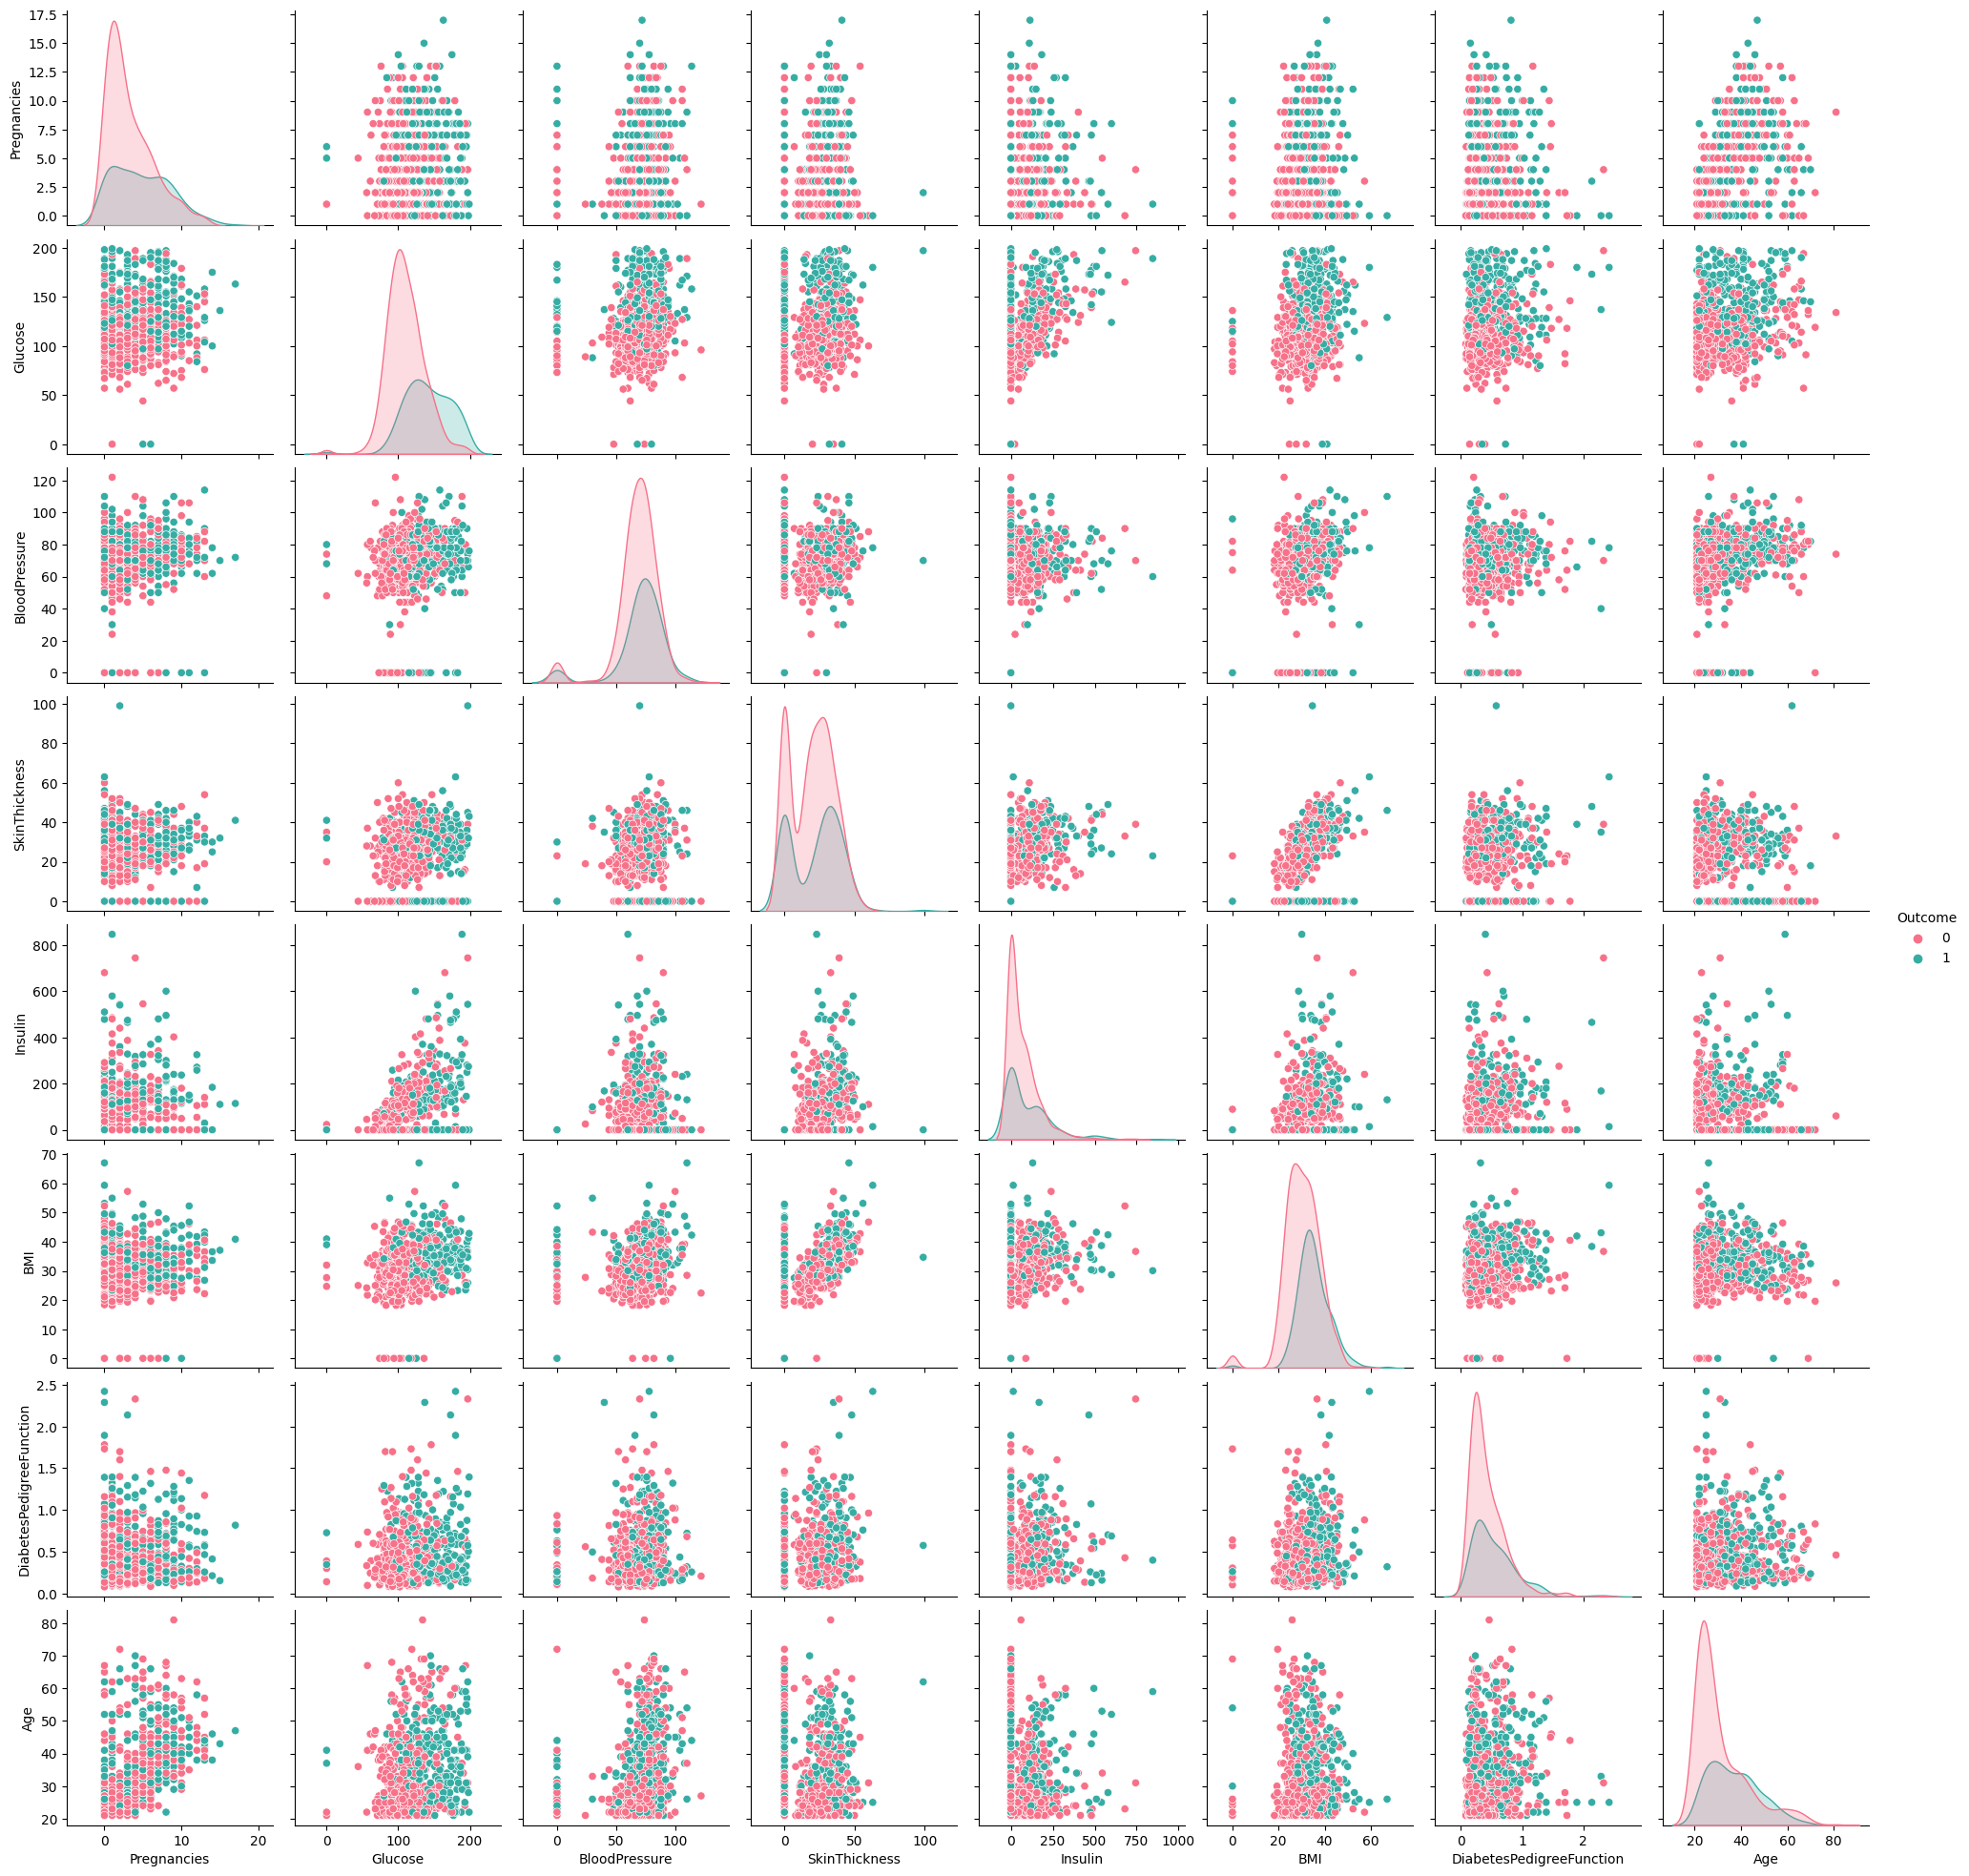

In [8]:
g = sns.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

Let's see for example pregnency distribution

In [9]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm='',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

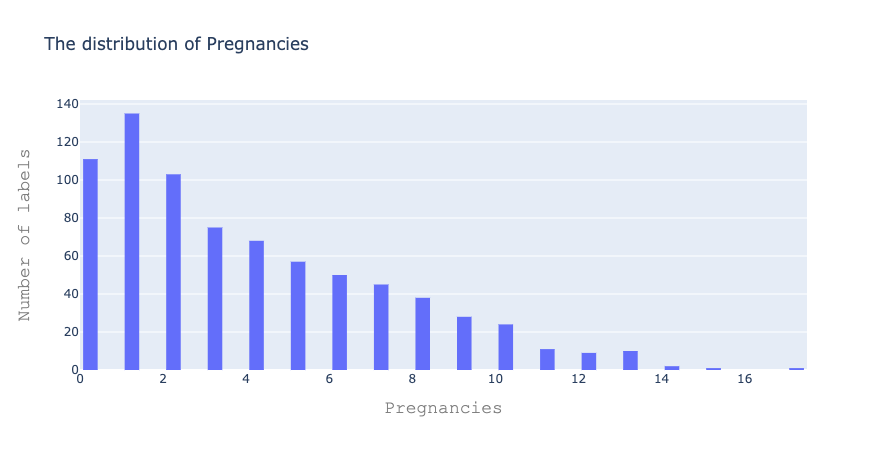

In [10]:
plotHist(df,'Pregnancies')

17 times pregnancy is a little bit strange is it outlier ?

Let's investagate each fearure distribution for each outcome

A fundamental task in many statistical analyses is to characterize
the location and variability of a data set. A further
characterization of the data includes **skewness and kurtosis**.

**Skewness** is a measure of symmetry, or more precisely, the lack
of symmetry. A distribution, or data set, is symmetric if it
looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case

In [11]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

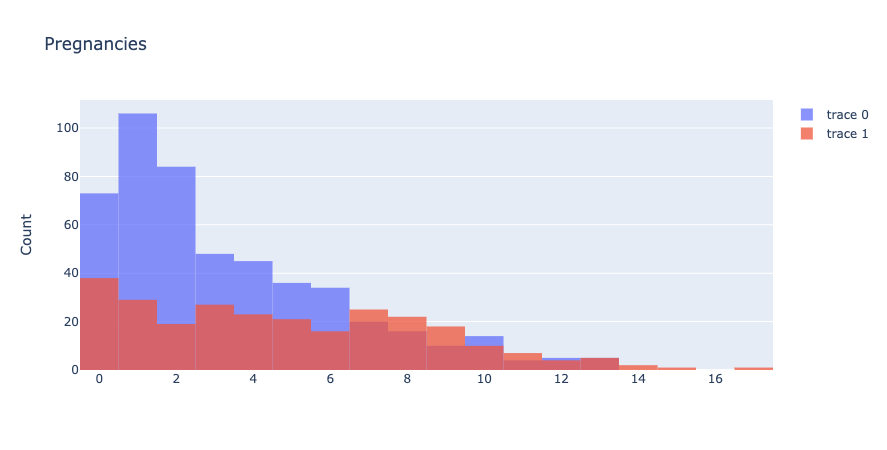

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [12]:
plotBarCat(df,df_name[0],'Outcome')

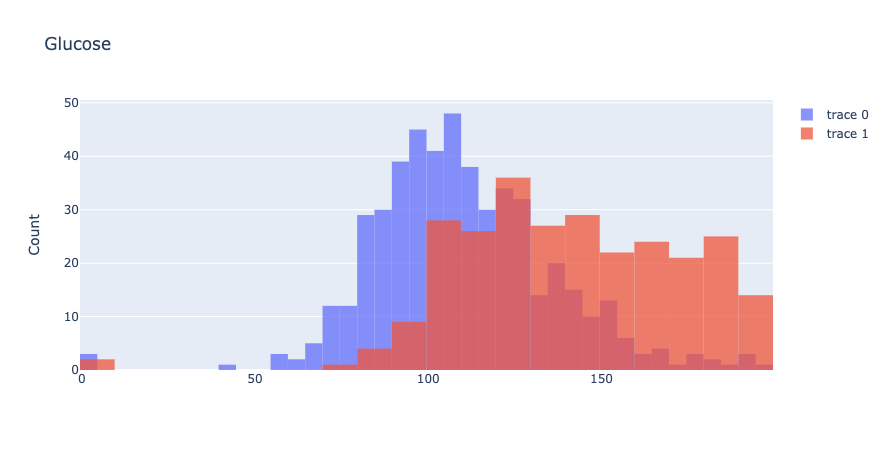

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [13]:
plotBarCat(df,df_name[1],'Outcome')

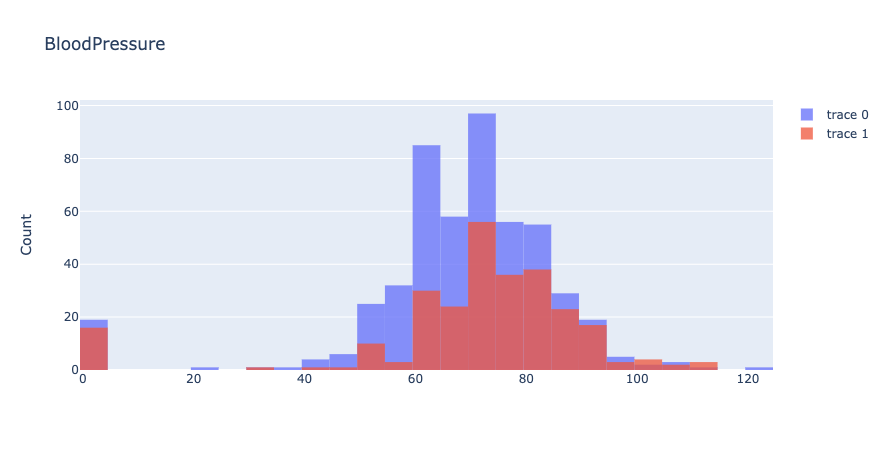

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [14]:
plotBarCat(df,df_name[2],'Outcome')

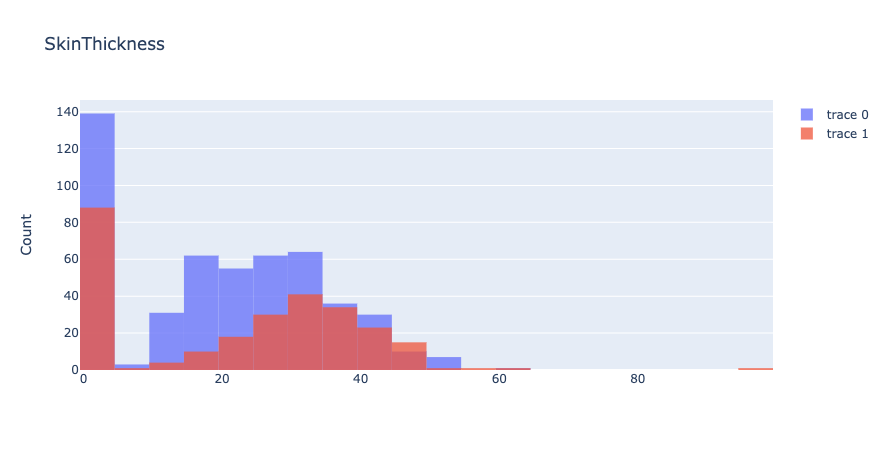

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [15]:
plotBarCat(df,df_name[3],'Outcome')

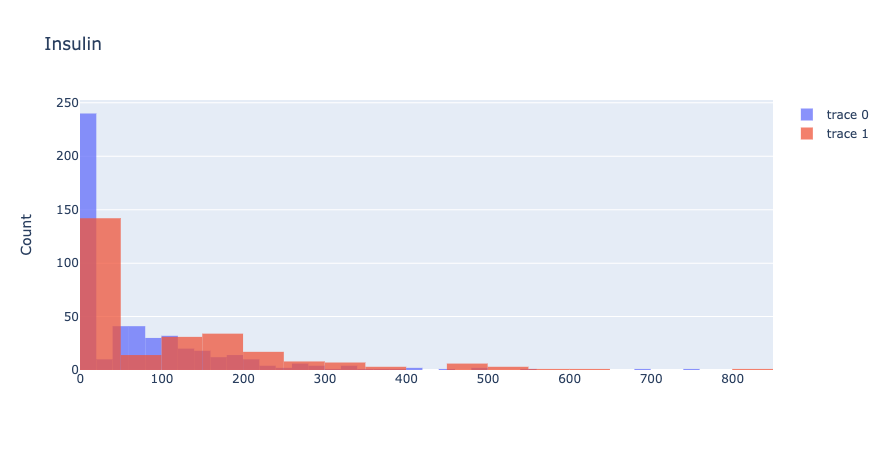

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [16]:
plotBarCat(df,df_name[4],'Outcome')

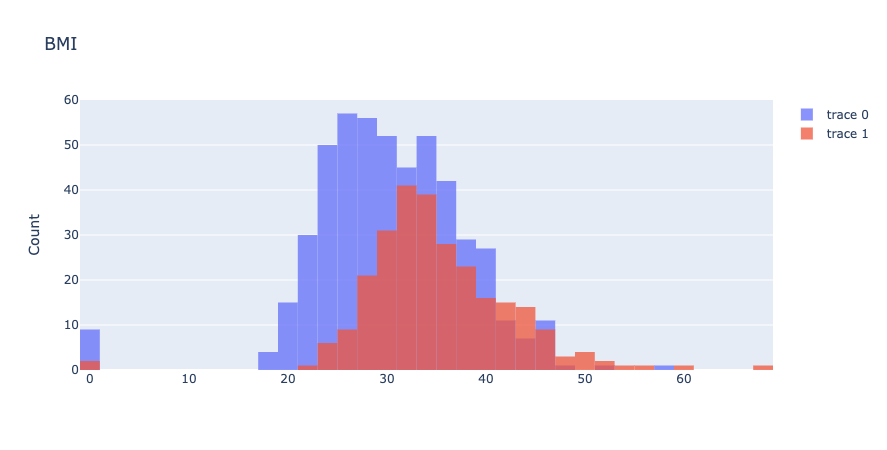

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df,df_name[5],'Outcome')

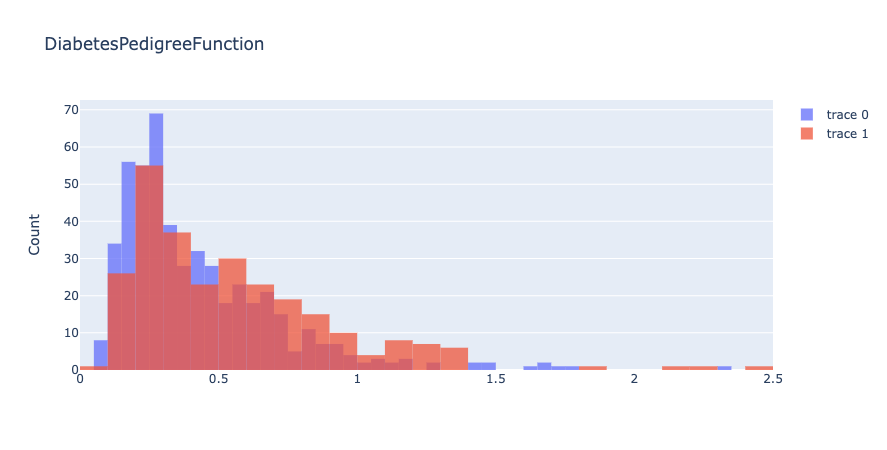

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
plotBarCat(df,df_name[6],'Outcome')

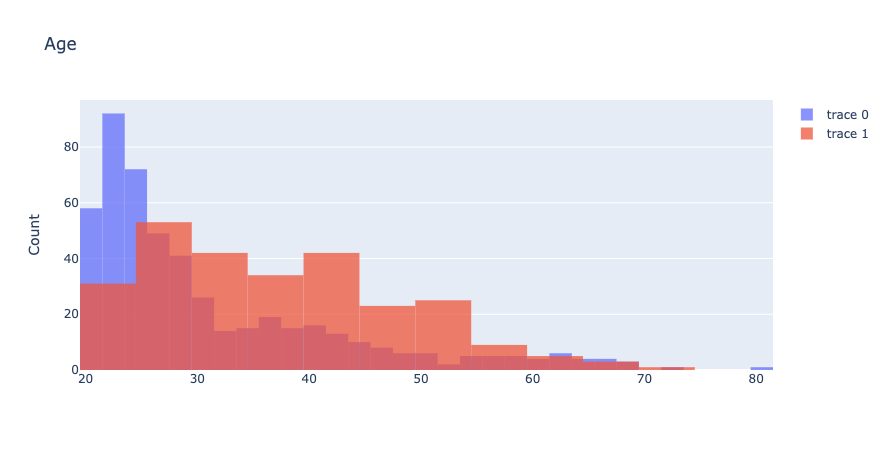

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [19]:
plotBarCat(df,df_name[7],'Outcome')

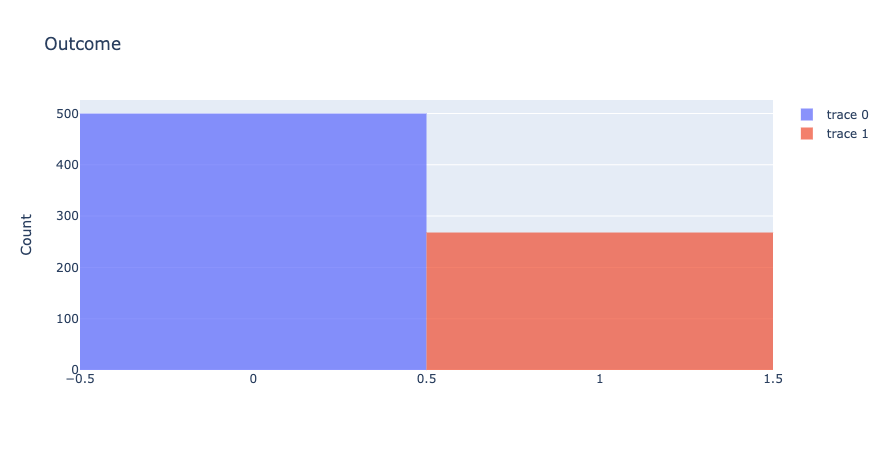

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [20]:
plotBarCat(df,df_name[8],'Outcome')

In [21]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

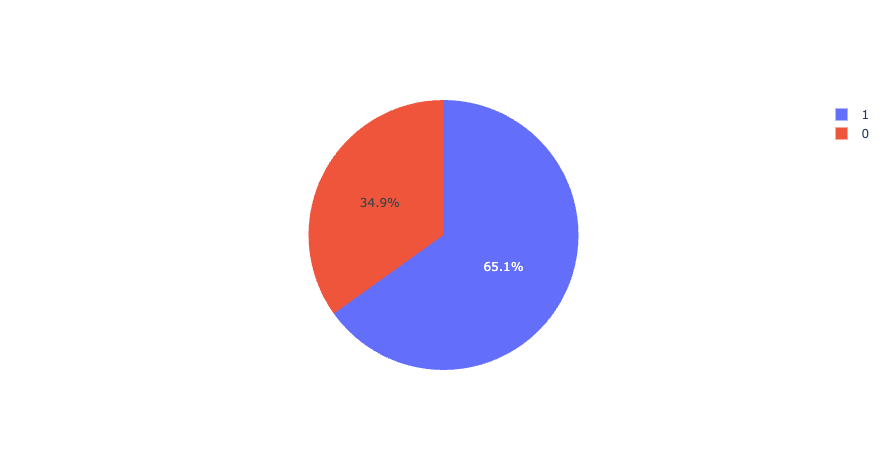

In [22]:
PlotPie(df, 'Outcome')

In the case of classification problem we alwyas need to check the target distribution.
If the distribution of target is not balance, we must treat our data more carefully.
For example we can use several methods to resampling our data. We do not resampling our data in this kernel. In addition, we need to use stratified method in our validation in order to keep the same distribution in our train and test.   

 ## 2.3.1 Outliers investigation

In [23]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    


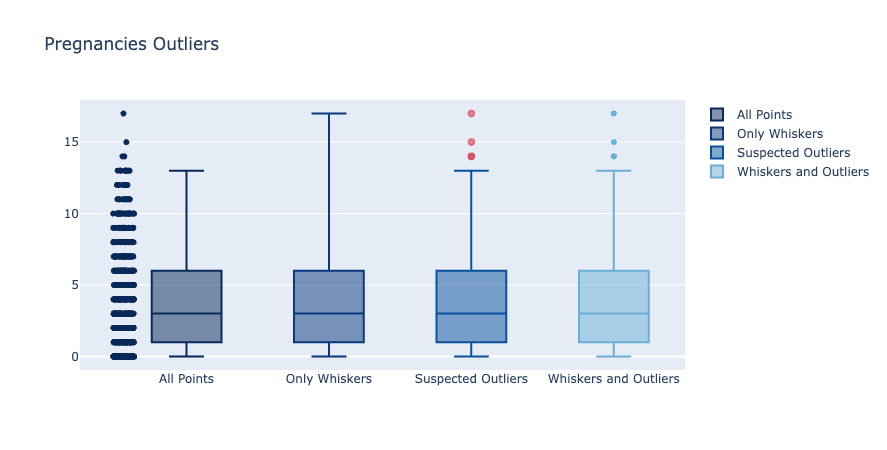

In [24]:
OutLiersBox(df,df_name[0])

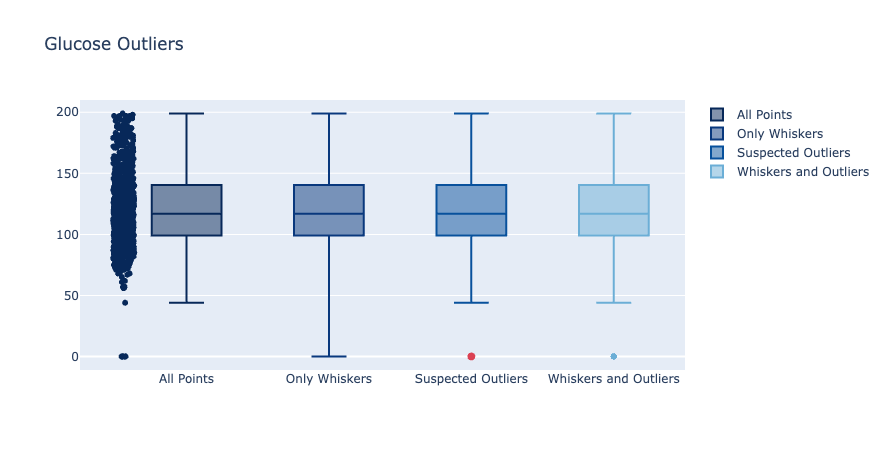

In [25]:
OutLiersBox(df,df_name[1])

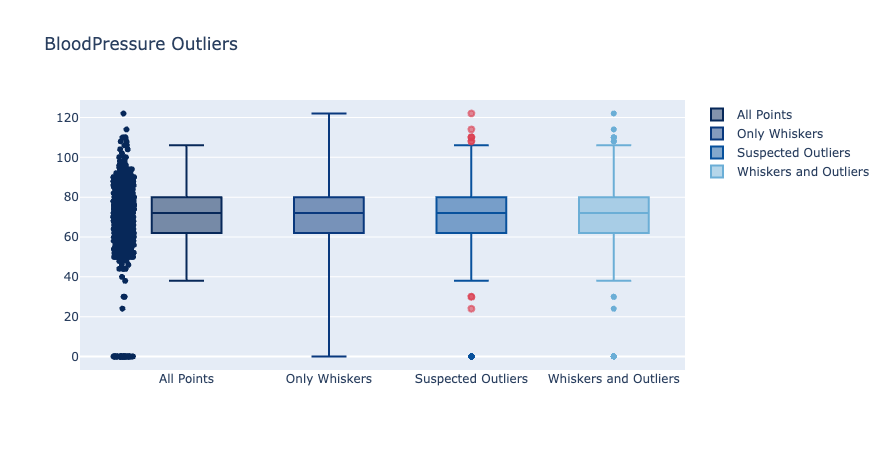

In [26]:
OutLiersBox(df,df_name[2])

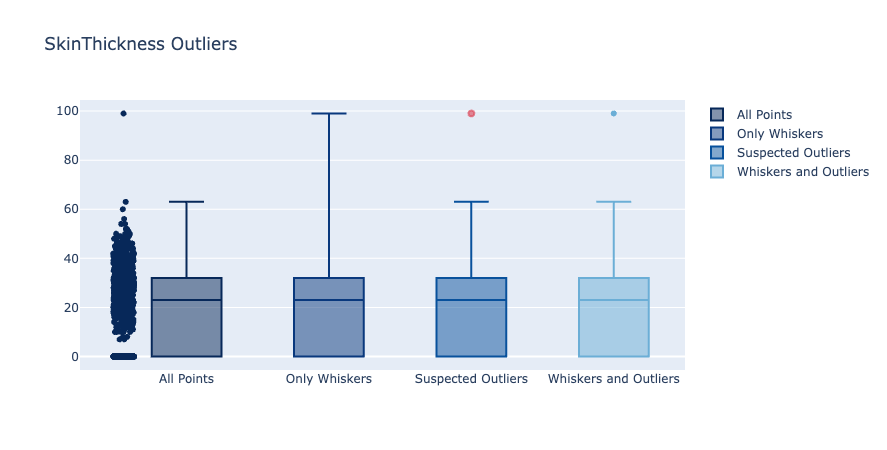

In [27]:
OutLiersBox(df,df_name[3])

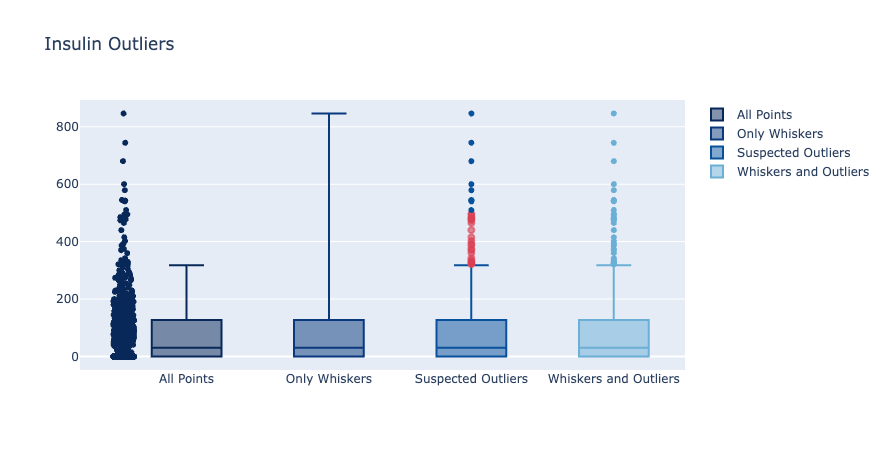

In [28]:
OutLiersBox(df,df_name[4])

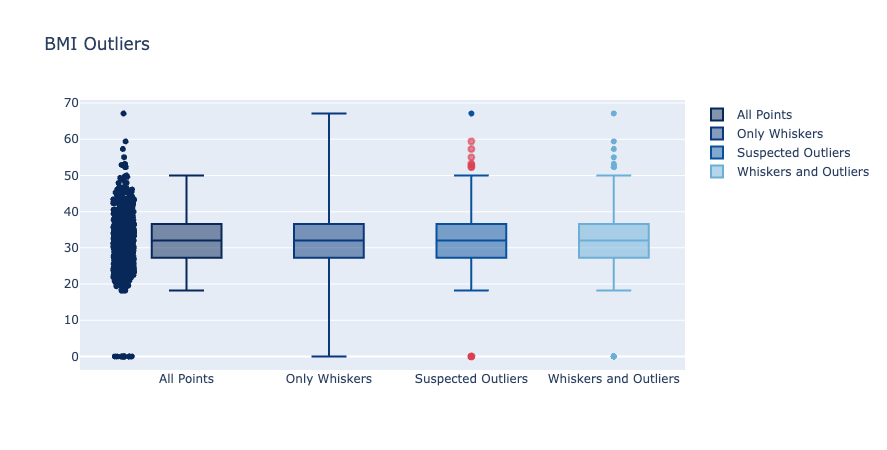

In [29]:
OutLiersBox(df,df_name[5])

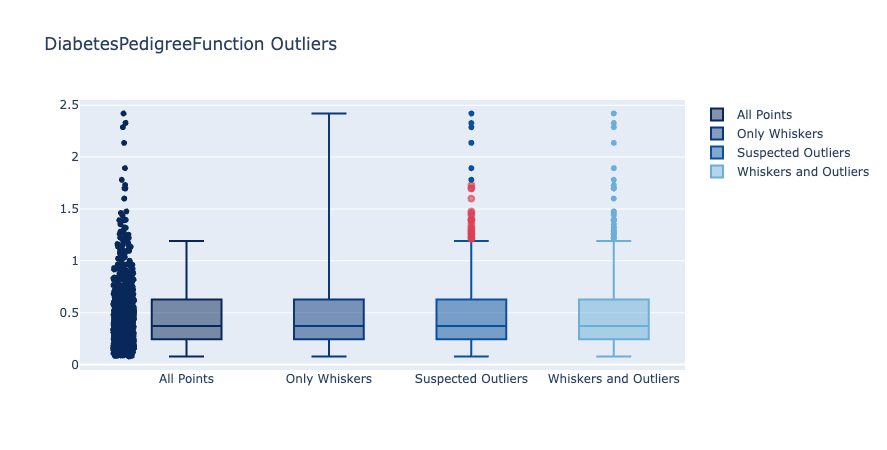

In [30]:
OutLiersBox(df,df_name[6])

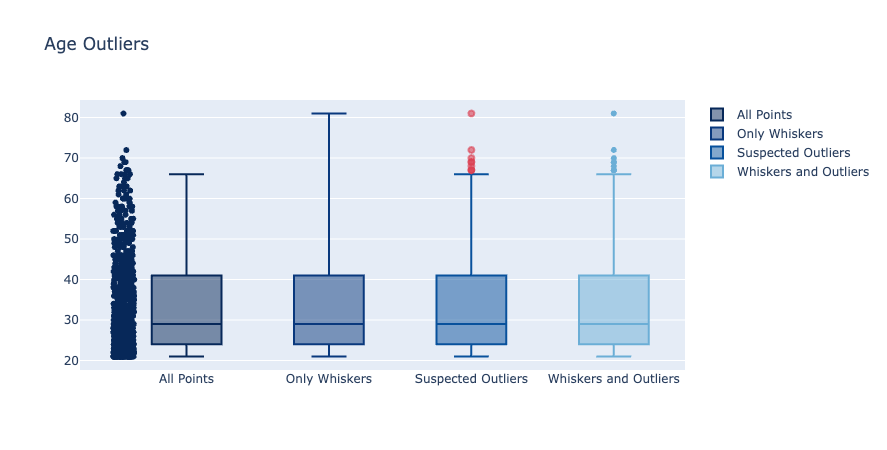

In [31]:
OutLiersBox(df,df_name[7])

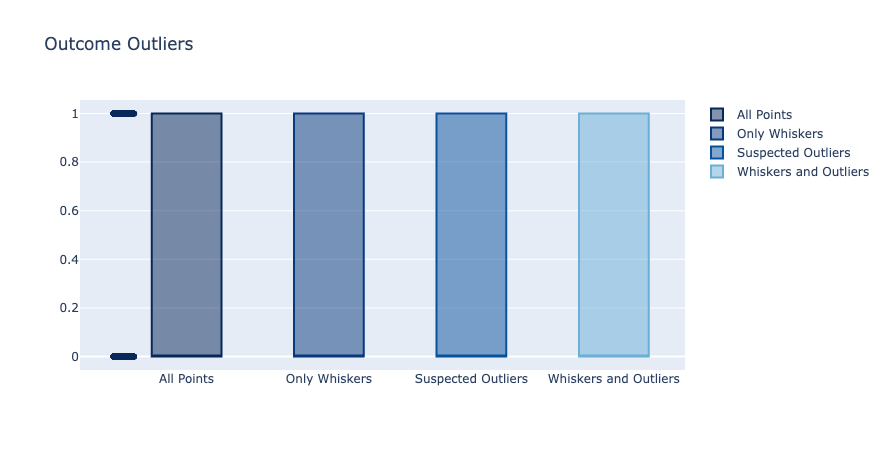

In [32]:
OutLiersBox(df,df_name[8])

## 2.3.2. Outliers investigation Pairs

In [33]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35, novelty=True, 
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1
    
    # Store indices of outliers
    outlier_indices = []

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                clf.fit(X)  # Train the model
                scores_pred = clf.decision_function(X) * -1  # Obtain outlier scores
                y_pred = clf.predict(X)
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
            # print(clf_name,y_pred) 
            # plot the levels lines and the points
    
            # Store indices of outliers
            outlier_indices.extend(new_df[new_df[feature1+'_'+feature2+clf_name] == -1].index.tolist())

            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df, outlier_indices

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


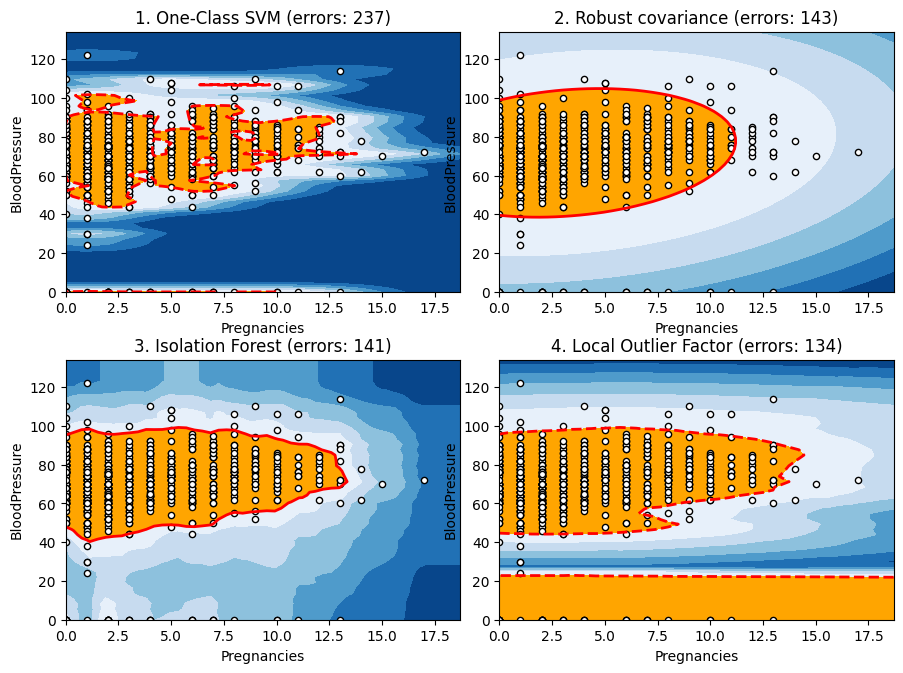

In [34]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

# 3.1. Evaluate Algorithms: Baseline

<a href="https://ibb.co/bWRCsS"><img src="https://preview.ibb.co/f7UAe7/validation.png" alt="validation" border="0" /></a>

- We usually devide the data to train and test set. We will not touch test set until the end of the computation and the final performance evaluation. Then, we can devide the train set to train and validation sets. We use the validation data set to tune the model. 

- Traditional train test method suffer from high variance test problem. It means that by changing the test set the result of the prediction changes. To over come this problem we use k-fold validation method in our train and validation set

<img src="https://image.ibb.co/bW0oXS/kfold.png" alt="kfold" border="0" />

In [35]:
# Load libraries

from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

let's make train-validation and test data sets.
- Note that stratify is used becasue we want to keep the train and test distribution 

In [36]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

## Spot-Check Algorithms

In [116]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(max_iter=1000)))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [117]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
#         kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=SEED)

        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [118]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

LR: 0.785556 (0.052721)
LDA: 0.785652 (0.043224)
KNN: 0.761498 (0.067693)
CART: 0.719807 (0.045143)
NB: 0.787778 (0.043837)
SVM: 0.798599 (0.042957)
AB: 0.752657 (0.046676)
GBM: 0.770145 (0.066183)
RF: 0.763575 (0.075189)
ET: 0.763623 (0.078543)


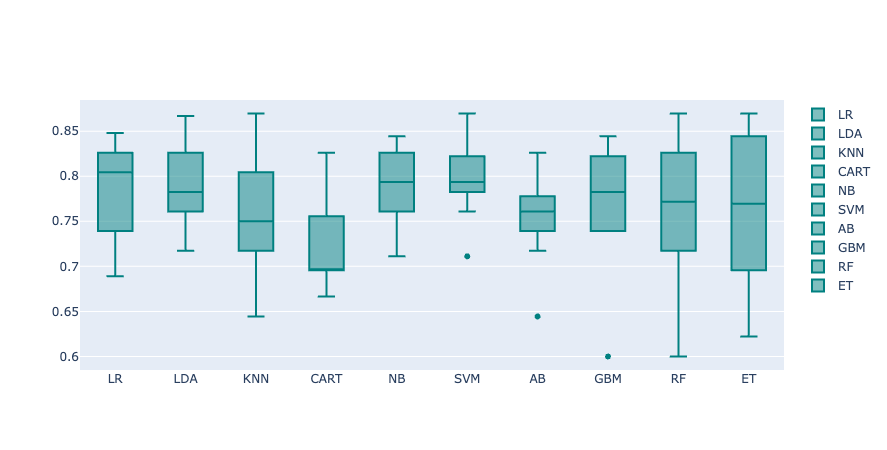

In [119]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

In [120]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [121]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7856
1   LDA  0.7857
2   KNN  0.7615
3  CART  0.7198
4    NB  0.7878
5   SVM  0.7986
6    AB  0.7527
7   GBM  0.7701
8    RF  0.7636
9    ET  0.7636

# Feature Engineering
## 4.1. Data Preprocessig

Numerical features preprocessing is different for tree and non tree model.

1) Usually:

Tree based models does not depend on scaling
Non-tree based models hugely depend on scaling
2) Most Often used preprocening are:

MinMax scaler to [0,1]
Standard Scaler to mean = 0 and std =1
Rank (We do not work on it in this data set)
Using np.log(1+data), np.sqrt(data) and stats.boxcox(data) (for exp dependency)
let's try some of them and see how our model prediction change by scalling

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(max_iter=1000))])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

Sometime saling help to improve the prediction of tree based model so let's see

### 4.1.2. Standard

standardLR: 0.798744 (0.041035)
standardLDA: 0.785652 (0.043224)
standardKNN: 0.757246 (0.061092)
standardCART: 0.726522 (0.037728)
standardNB: 0.787778 (0.043837)
standardSVM: 0.800821 (0.038742)
standardAB: 0.752657 (0.046676)
standardGBM: 0.767923 (0.063245)
standardRF: 0.770242 (0.080013)
standardET: 0.776860 (0.082206)


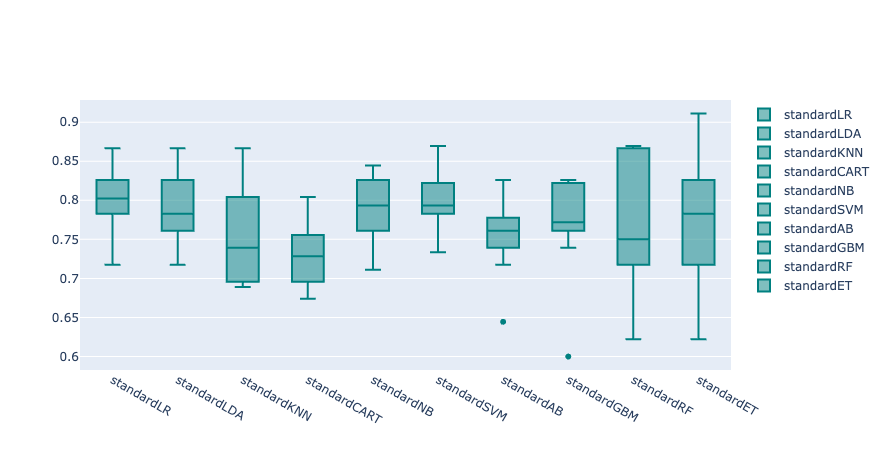

Model   Score         Model   Score
0    LR  0.7856    standardLR  0.7987
1   LDA  0.7857   standardLDA  0.7857
2   KNN  0.7615   standardKNN  0.7572
3  CART  0.7198  standardCART  0.7265
4    NB  0.7878    standardNB  0.7878
5   SVM  0.7986   standardSVM  0.8008
6    AB  0.7527    standardAB  0.7527
7   GBM  0.7701   standardGBM  0.7679
8    RF  0.7636    standardRF  0.7702
9    ET  0.7636    standardET  0.7769

In [124]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

### 4.1.2. MinMax

minmaxLR: 0.785556 (0.052721)
minmaxLDA: 0.785652 (0.043224)
minmaxKNN: 0.759324 (0.071416)
minmaxCART: 0.715362 (0.051641)
minmaxNB: 0.787778 (0.043837)
minmaxSVM: 0.800773 (0.042642)
minmaxAB: 0.752657 (0.046676)
minmaxGBM: 0.772367 (0.068955)
minmaxRF: 0.774638 (0.068855)
minmaxET: 0.774638 (0.076031)


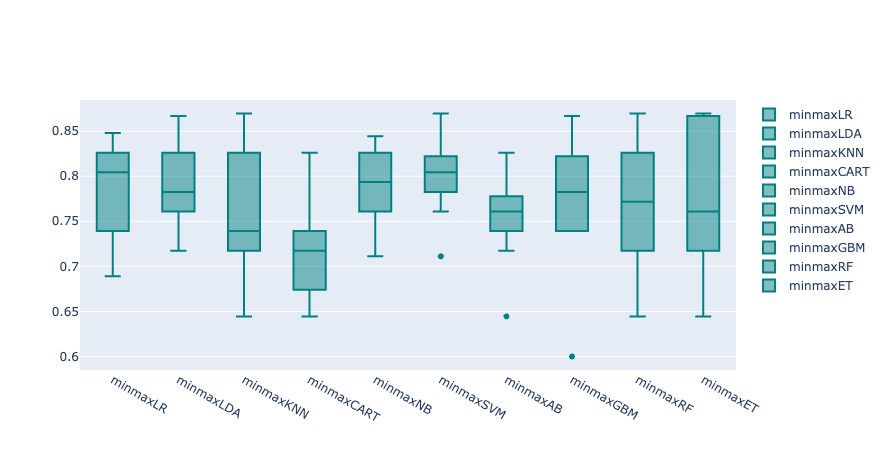

Model   Score         Model   Score       Model   Score
0    LR  0.7856    standardLR  0.7987    minmaxLR  0.7856
1   LDA  0.7857   standardLDA  0.7857   minmaxLDA  0.7857
2   KNN  0.7615   standardKNN  0.7572   minmaxKNN  0.7593
3  CART  0.7198  standardCART  0.7265  minmaxCART  0.7154
4    NB  0.7878    standardNB  0.7878    minmaxNB  0.7878
5   SVM  0.7986   standardSVM  0.8008   minmaxSVM  0.8008
6    AB  0.7527    standardAB  0.7527    minmaxAB  0.7527
7   GBM  0.7701   standardGBM  0.7679   minmaxGBM  0.7724
8    RF  0.7636    standardRF  0.7702    minmaxRF  0.7746
9    ET  0.7636    standardET  0.7769    minmaxET  0.7746

In [125]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

As we can see, the standarscaler and min and max effect on non tree models and the prediction results improve 

## 4.2. Remove Outliers

let's remove outliers and see how it effects on the prediction

In [126]:
df_t = df.copy()
df_t_name = df_t.columns

In [127]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

### Feature 0

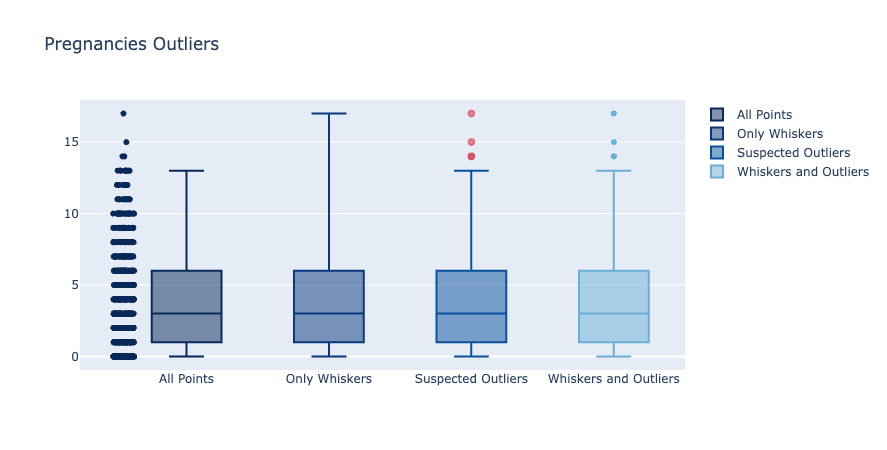

In [128]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


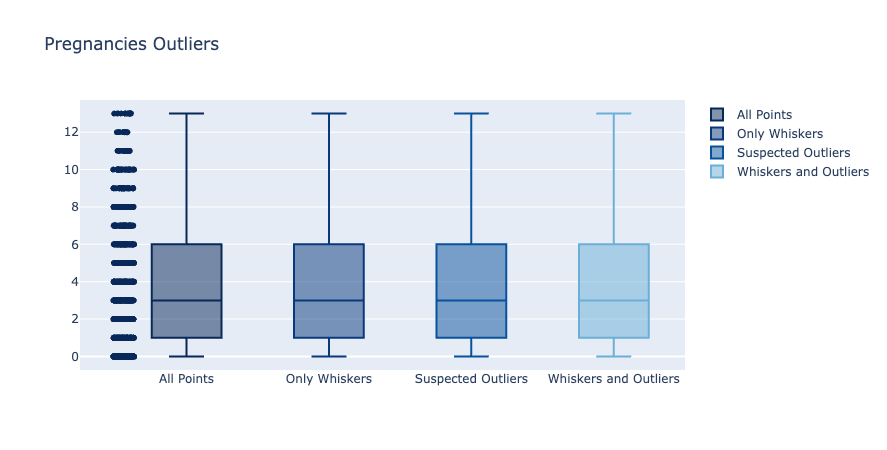

In [129]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 1

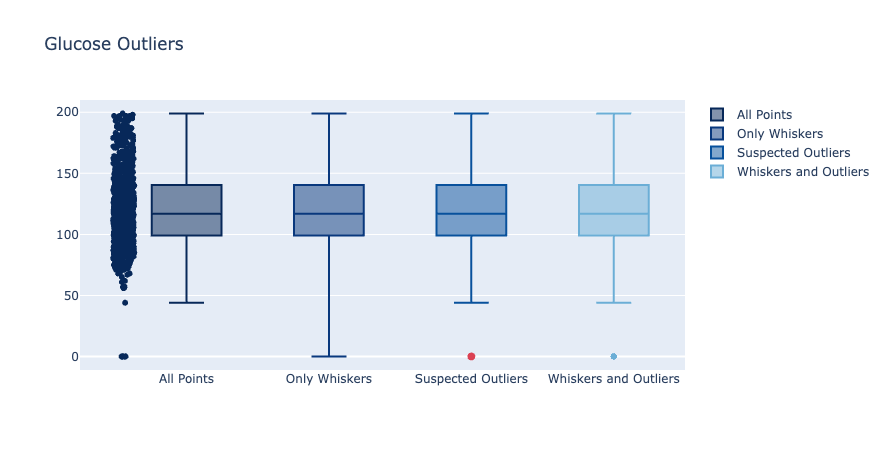

In [130]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


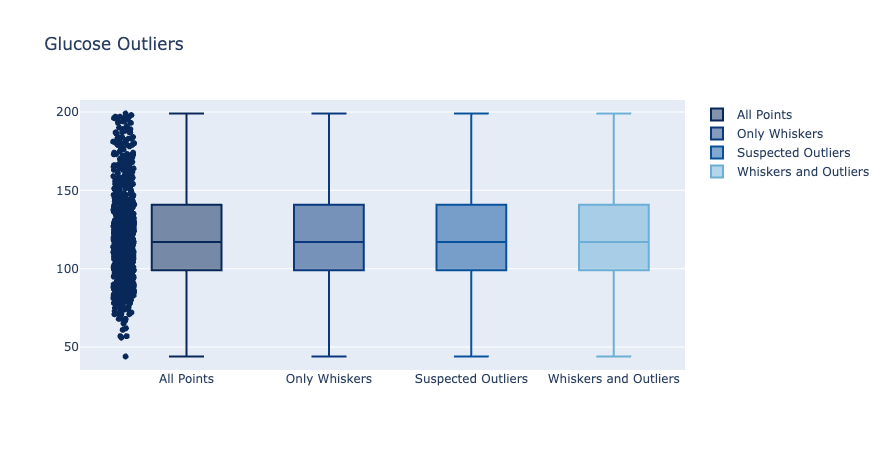

In [131]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 2

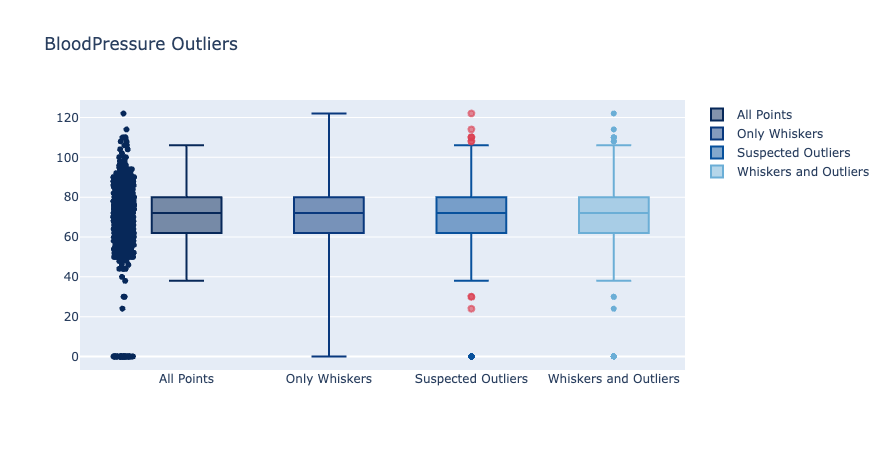

In [132]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


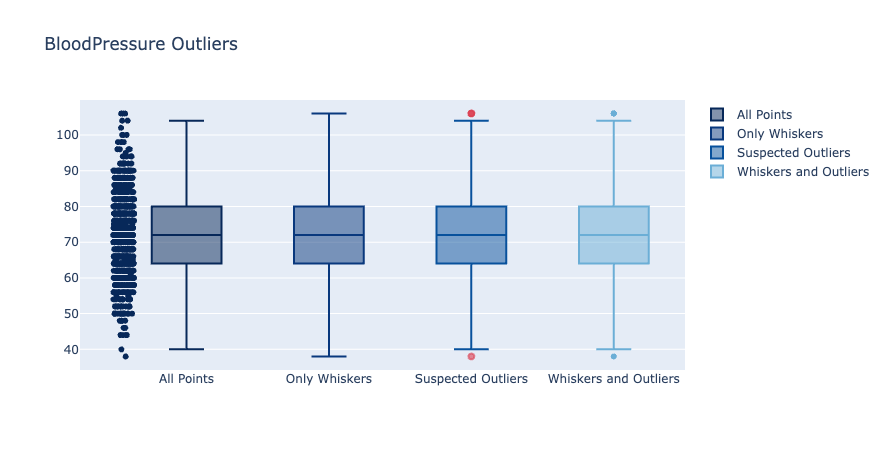

In [133]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 3

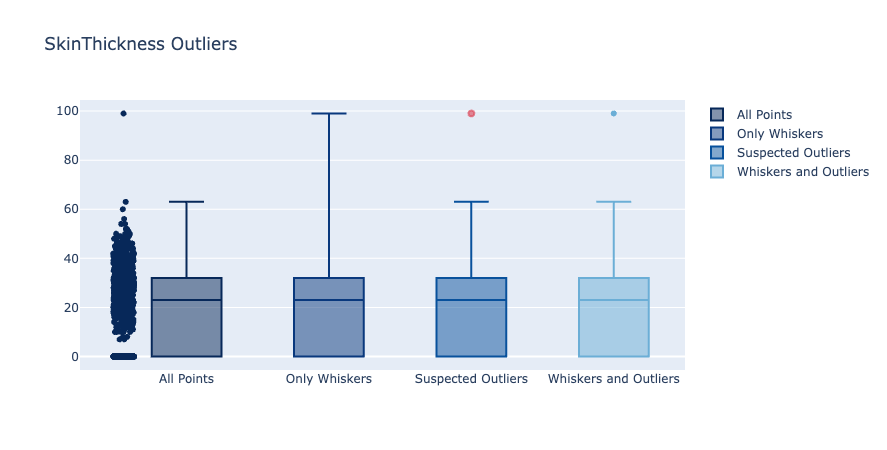

In [134]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


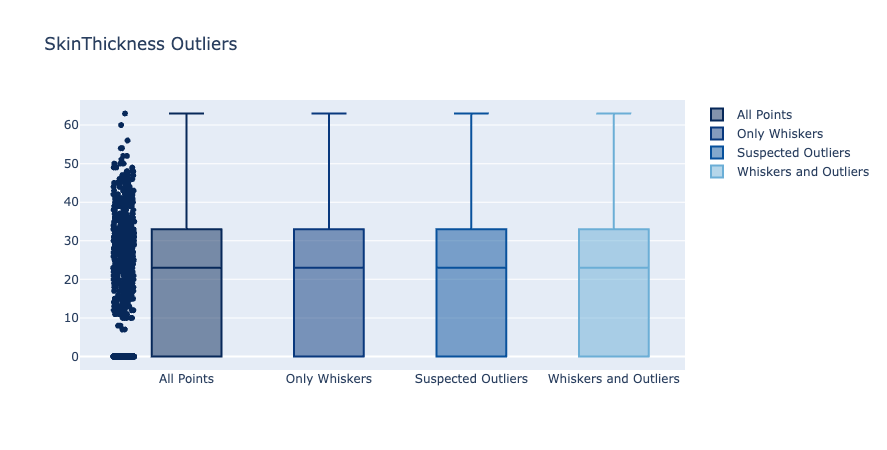

In [135]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 4

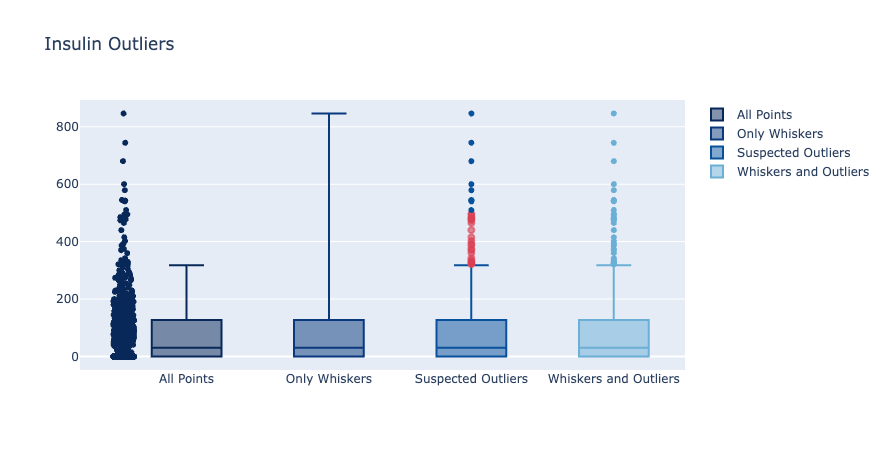

In [136]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


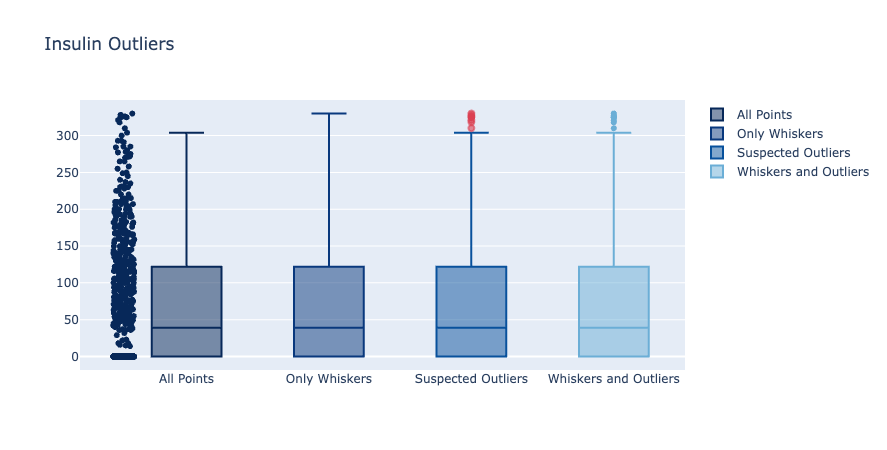

In [137]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

### Feature 5

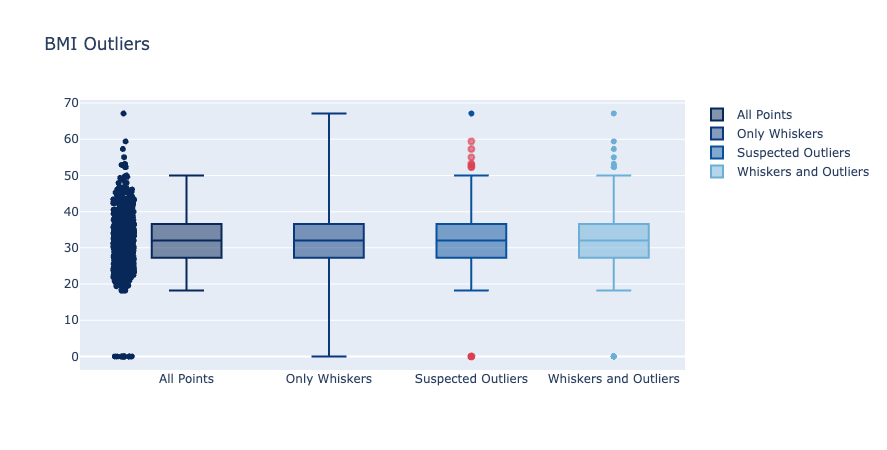

In [138]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


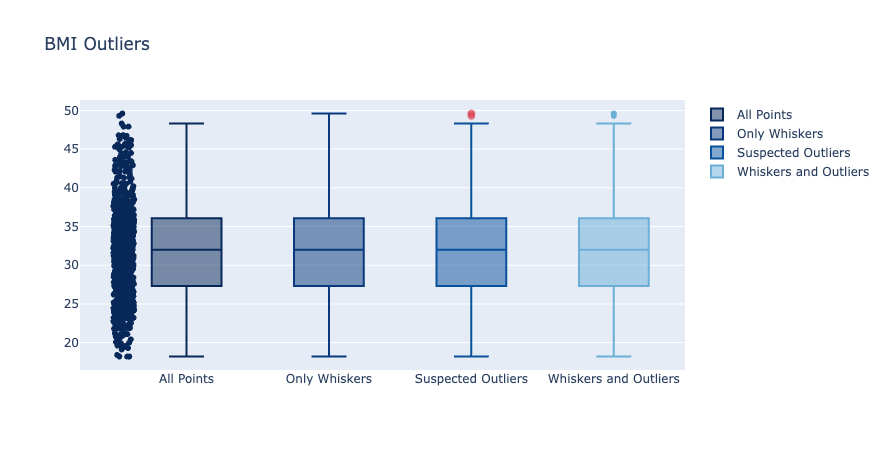

In [139]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 6

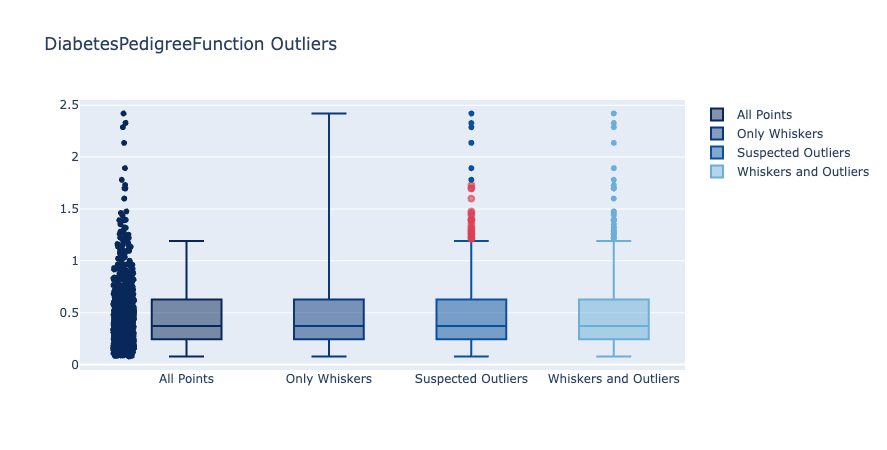

In [140]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


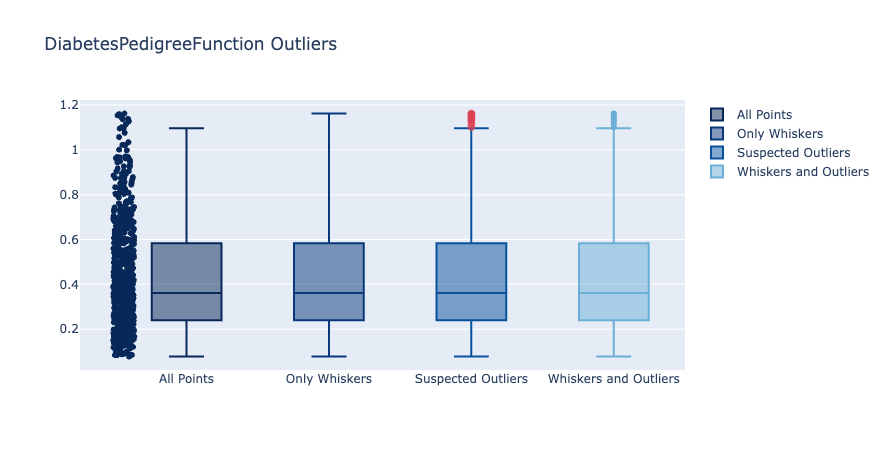

In [141]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 7

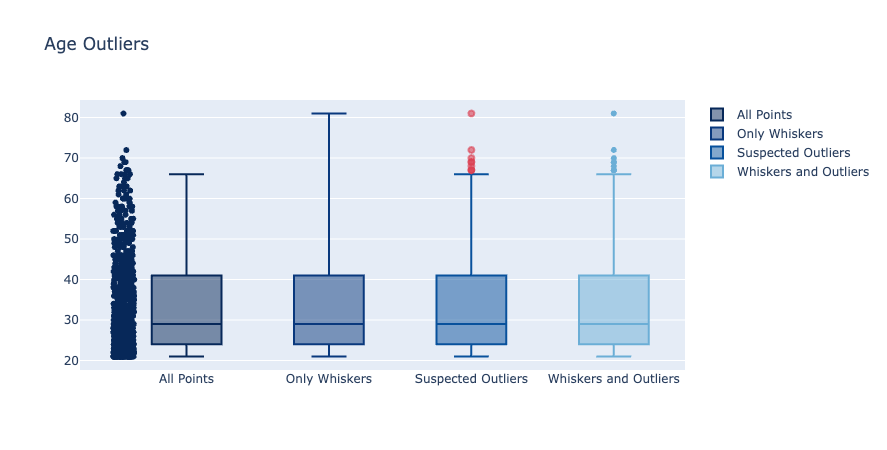

In [142]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


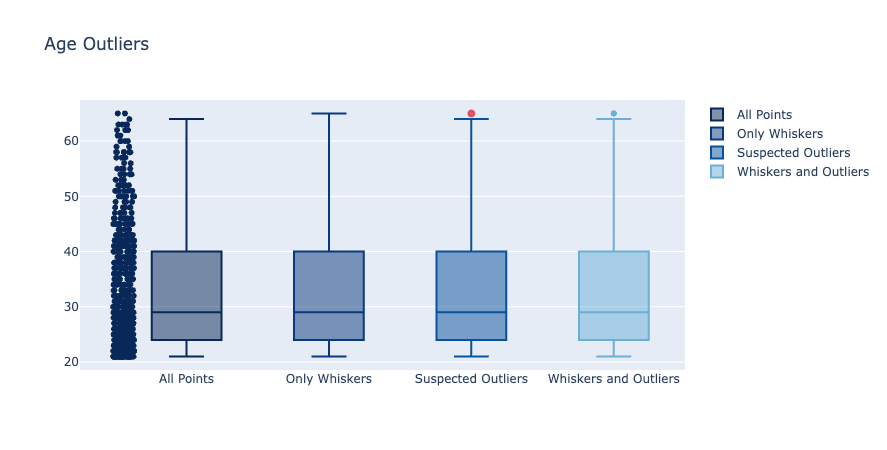

In [143]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 8 

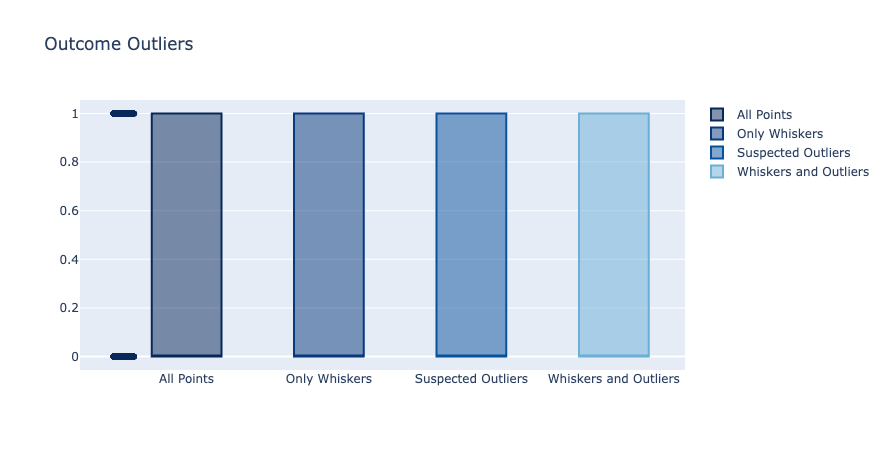

In [144]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


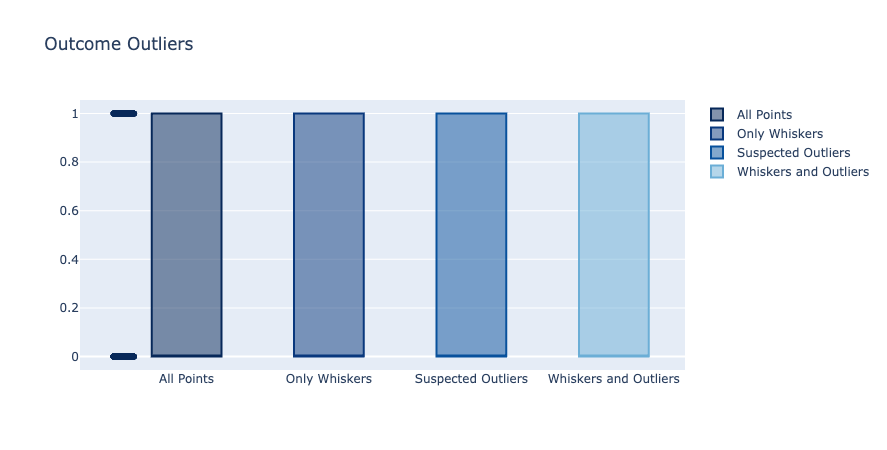

In [145]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

** Cleaning Report **

In [146]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


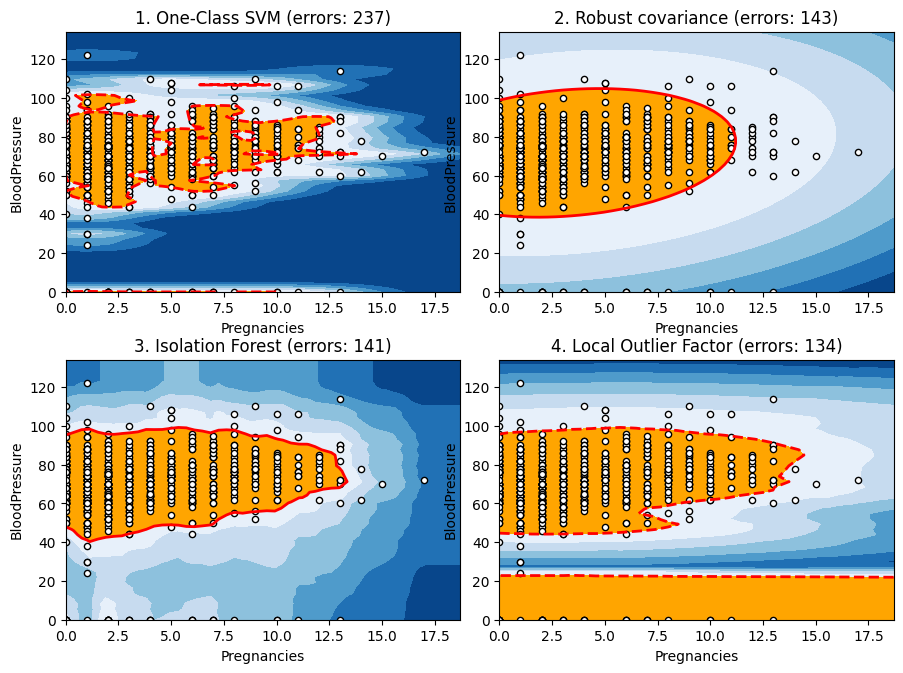

In [147]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 60, 1: 576}


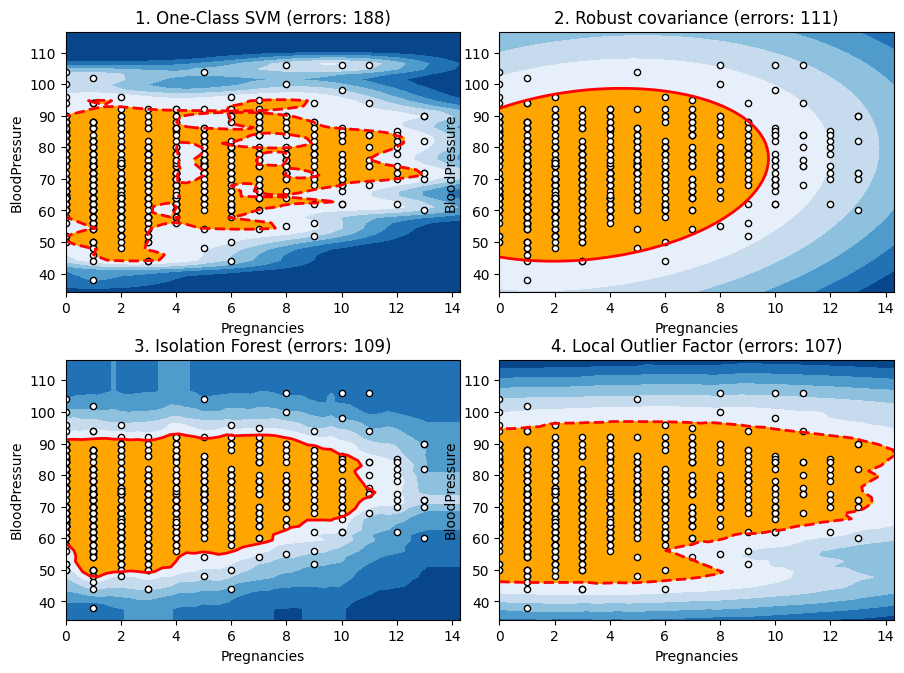

In [148]:
tt_t, outlier_indices = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

## Comparing the accuracy of models after cleaning

In [149]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

minmaxLR: 0.779699 (0.041917)
minmaxLDA: 0.775488 (0.042942)
minmaxKNN: 0.756826 (0.021093)
minmaxCART: 0.714539 (0.081704)
minmaxNB: 0.765027 (0.037110)
minmaxSVM: 0.775621 (0.040434)
minmaxAB: 0.744326 (0.035275)
minmaxGBM: 0.752482 (0.053504)
minmaxRF: 0.766977 (0.053920)
minmaxET: 0.767021 (0.049884)


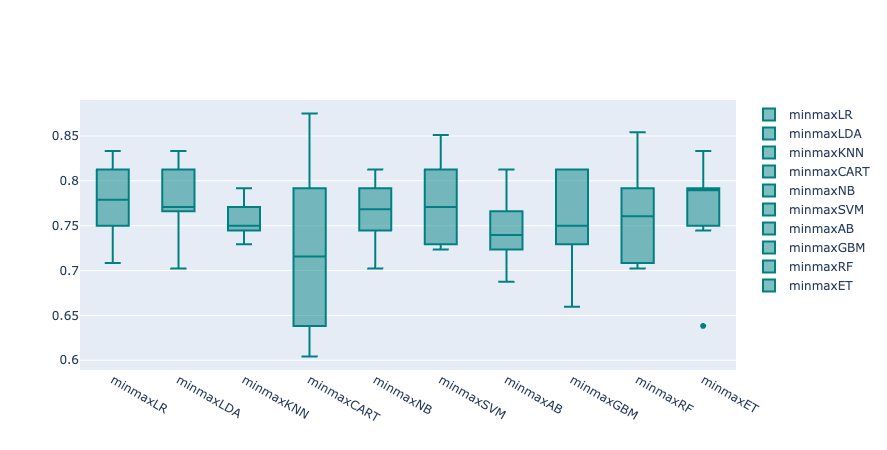

Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7856    standardLR  0.7987    minmaxLR  0.7856    minmaxLR  0.7797
1   LDA  0.7857   standardLDA  0.7857   minmaxLDA  0.7857   minmaxLDA  0.7755
2   KNN  0.7615   standardKNN  0.7572   minmaxKNN  0.7593   minmaxKNN  0.7568
3  CART  0.7198  standardCART  0.7265  minmaxCART  0.7154  minmaxCART  0.7145
4    NB  0.7878    standardNB  0.7878    minmaxNB  0.7878    minmaxNB  0.7650
5   SVM  0.7986   standardSVM  0.8008   minmaxSVM  0.8008   minmaxSVM  0.7756
6    AB  0.7527    standardAB  0.7527    minmaxAB  0.7527    minmaxAB  0.7443
7   GBM  0.7701   standardGBM  0.7679   minmaxGBM  0.7724   minmaxGBM  0.7525
8    RF  0.7636    standardRF  0.7702    minmaxRF  0.7746    minmaxRF  0.7670
9    ET  0.7636    standardET  0.7769    minmaxET  0.7746    minmaxET  0.7670

In [151]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

It can be seen that the prediction is improving

**Now is your turn you can delete the outlier in pair plot to see how the result change and share your result in comment.**

In [161]:
# # Remove outliers from the DataFrame
# df_pairs_cleaned = df_clean.copy()
# df_pairs_cleaned.drop(outlier_indices)


In [162]:
# df_pairs_cleaned_name = df_pairs_cleaned.columns
# X_c =  df_pairs_cleaned[df_pairs_cleaned_name[0:8]]
# Y_c = df_pairs_cleaned[df_pairs_cleaned_name[8]]
# X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
#                                                    test_size=0.25,
#                                                    random_state=0,
#                                                    stratify=df_pairs_cleaned['Outcome'])

In [163]:
# models = GetScaledModel('minmax')
# names,results = BasedLine2(X_train_c, y_train_c,models)
# PlotBoxR().PlotResult(names,results)

# scaledScoreMinMax_pc = ScoreDataFrame(names,results)
# compareModels = pd.concat([basedLineScore,
#                            scaledScoreStandard,
#                           scaledScoreMinMax,
#                           scaledScoreMinMax_c,
#                           scaledScoreMinMax_pc], axis=1)
# compareModels

## 4.3. Feature Selection
Feature selection is also called variable selection or attribute selection.
It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

### 4.3.1. Corrolation

If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.  

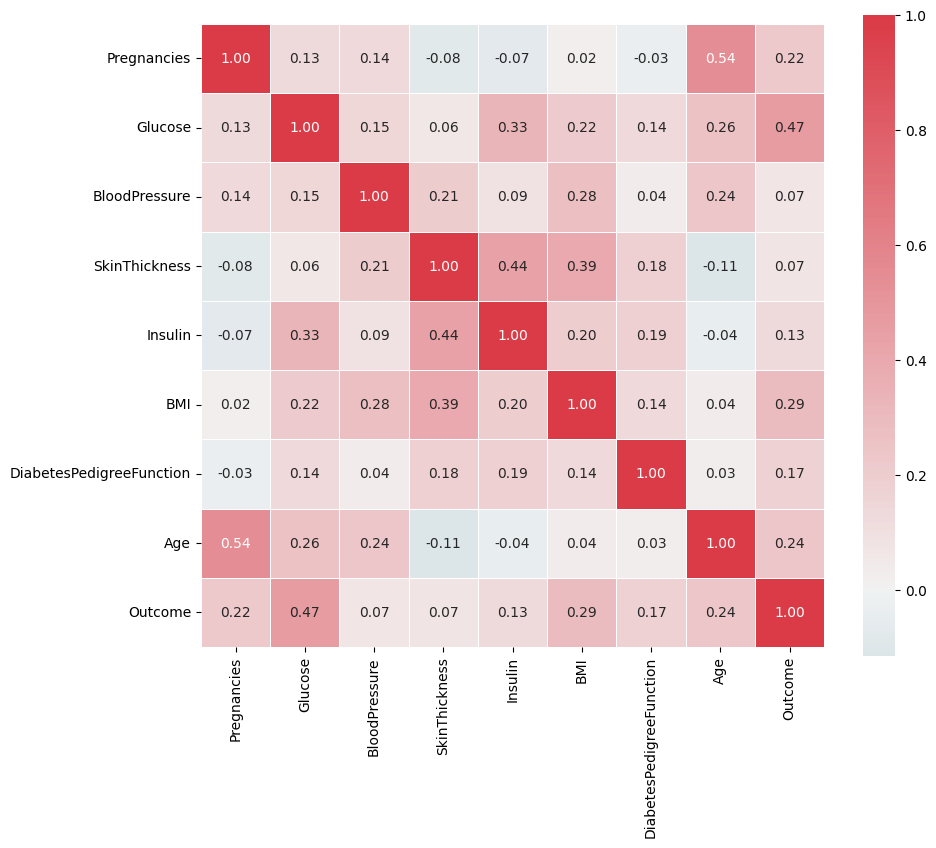

In [164]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is not highly corrolated feature in this data set.

## 4.3.2.Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

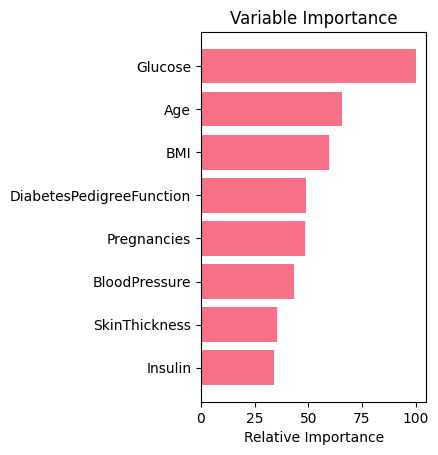

In [165]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [166]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [167]:
df_feature_imp_name = df_feature_imp.columns

In [168]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

minmaxLR: 0.791954 (0.060980)
minmaxLDA: 0.785027 (0.057899)
minmaxKNN: 0.758590 (0.049201)
minmaxCART: 0.715064 (0.041812)
minmaxNB: 0.781518 (0.056984)
minmaxSVM: 0.790109 (0.055234)
minmaxAB: 0.753297 (0.060581)
minmaxGBM: 0.774440 (0.052387)
minmaxRF: 0.756866 (0.049167)
minmaxET: 0.753418 (0.039993)


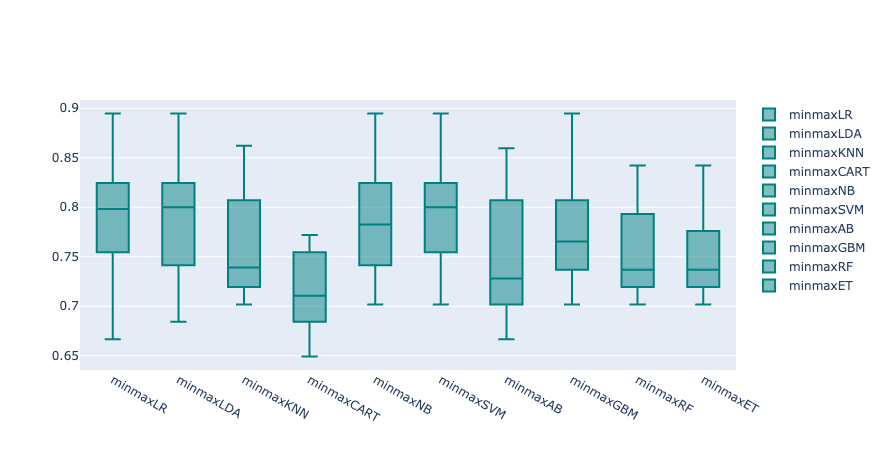

Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7856    standardLR  0.7987    minmaxLR  0.7856    minmaxLR  0.7797   
1   LDA  0.7857   standardLDA  0.7857   minmaxLDA  0.7857   minmaxLDA  0.7755   
2   KNN  0.7615   standardKNN  0.7572   minmaxKNN  0.7593   minmaxKNN  0.7568   
3  CART  0.7198  standardCART  0.7265  minmaxCART  0.7154  minmaxCART  0.7145   
4    NB  0.7878    standardNB  0.7878    minmaxNB  0.7878    minmaxNB  0.7650   
5   SVM  0.7986   standardSVM  0.8008   minmaxSVM  0.8008   minmaxSVM  0.7756   
6    AB  0.7527    standardAB  0.7527    minmaxAB  0.7527    minmaxAB  0.7443   
7   GBM  0.7701   standardGBM  0.7679   minmaxGBM  0.7724   minmaxGBM  0.7525   
8    RF  0.7636    standardRF  0.7702    minmaxRF  0.7746    minmaxRF  0.7670   
9    ET  0.7636    standardET  0.7769    minmaxET  0.7746    minmaxET  0.7670   

        Model   Score  
0    minmaxLR  0.7920  
1   minmaxLDA  0.7850  
2   minmaxKNN  0.7586  
3  minmaxCART  0.7151  
4    minmaxNB  0.7815  
5   minmaxSVM  0.7901  
6    minmaxAB  0.7533  
7   minmaxGBM  0.7744  
8    minmaxRF  0.7569  
9    minmaxET  0.7534

In [169]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

# 5. Algortithm Tuning

In [172]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [173]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [174]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

<img src="https://image.ibb.co/cQh2sS/1_ZTl_Qm_WRcr_Nq_L_n_Lnx6_GJA.png" alt="1 ZTl Qm WRcr Nq L n Lnx6 GJA" border="0" />

In [185]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [186]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

## 5.1.Logistic Regression
- C : Regularization value, the more, the stronger the regularization(double). 
- RegularizationType: Can be either "L2" or “L1”. Default is “L2”. 

In [187]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [188]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 2.8812979737686324, 'penalty': 'l2'}


In [180]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [184]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.84375


## 5.2. KNN
- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [191]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)


In [192]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))


Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125


## 5.3. SVC 
- C: The Penalty parameter C of the error term. 
- Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [195]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [196]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375


## 5.4. Decision Tree
- max_depth:  Maximum depth of the tree (double).
- row_subsample: Proportion of observations to consider (double).
- max_features: Proportion of columns (features) to consider in each level (double).

In [197]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [198]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [199]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.769298 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
prediction on test set is: 0.734375


## 5.5 AdaBoostClassifier
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
- n_estimators: Number of trees to build.

In [200]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [201]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))


Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


## 5.6 GradientBoosting

In [202]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [203]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


## 5.7. RandomForest

In [215]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [216]:
model_RF = RandomForestClassifier()
RF_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_RF,param_grid)
Prediction_RF = RF_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_RF).mean(),7))

Best: 0.802511 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
prediction on test set is: 0.734375


## 5.8. ExtraTrees

In [217]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [218]:
model_ET = ExtraTreesClassifier()
ET_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_ET,param_grid)
Prediction_ET = ET_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_ET).mean(),7))

Best: 0.792075 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3}
prediction on test set is: 0.828125


 # 6. Ensemble Methods

## 6.1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [220]:
from sklearn.ensemble import VotingClassifier

In [221]:
param = {'C': 2.8812979737686324, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 0.1, 'kernel': 'poly'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 200}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

param = {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
model8 = RandomForestClassifier()

param = {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3}
model9 = ExtraTreesClassifier()

In [222]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [223]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7883847549909254
Accuracy on test: 0.828125


## Beyond Voting

In [227]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 2.8812979737686324, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 0.1, 'kernel': 'poly', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 200}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    param = {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
    model8 = RandomForestClassifier()

    param = {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3}
    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [230]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(model_list.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [231]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



In [107]:
# !pip install --upgrade mlens

In [232]:
from mlens.visualization import corrmat

# corrmat(P.corr(), inflate=False)


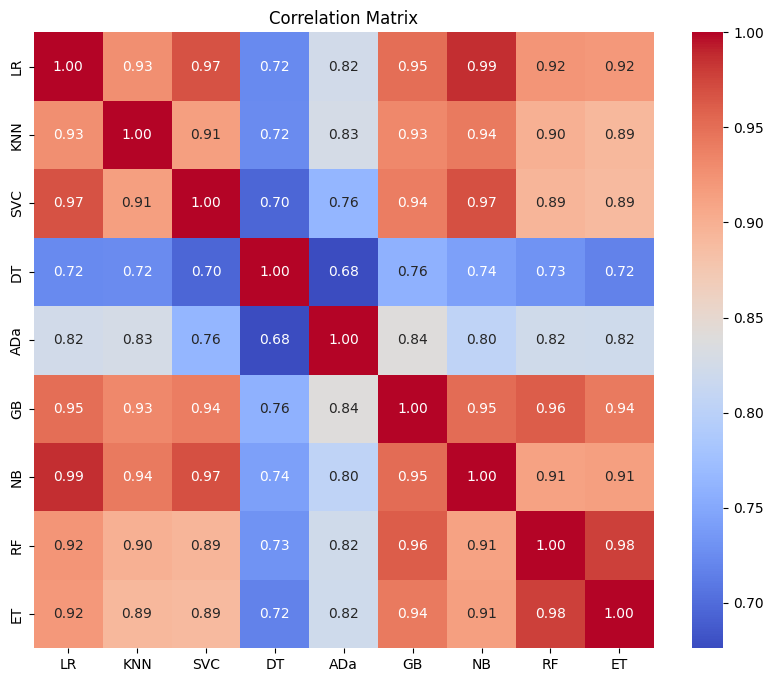

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = P.corr()

# Plot correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

In [234]:
# corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

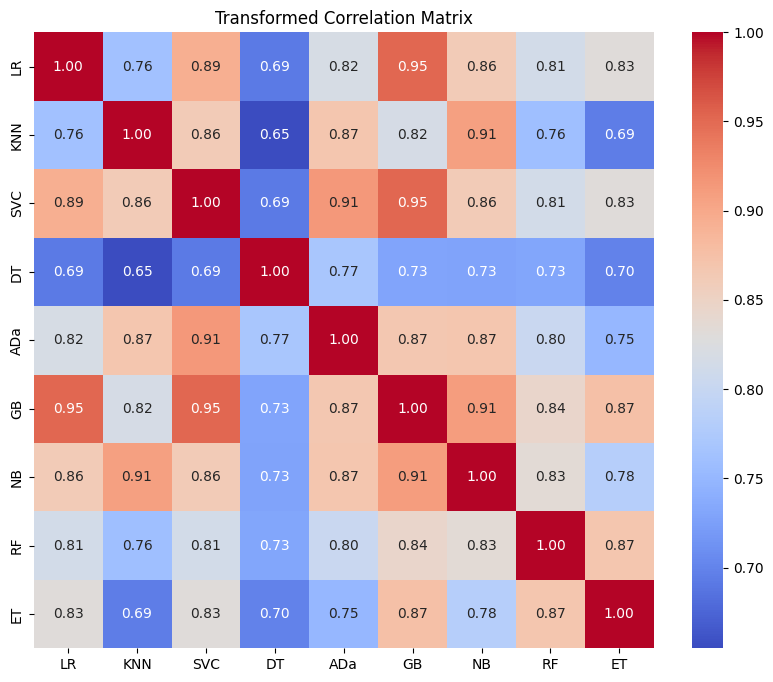

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to transform predictions and calculate correlation matrix
def transform_and_corr(predic):
    transformed = 1 * (predic >= 0.5) - y_test_sc
    return transformed

# Apply the function to the predictions and calculate correlation matrix
transformed_corr = P.apply(transform_and_corr).corr()

# Plot correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transformed_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Transformed Correlation Matrix')
plt.show()


# 6.3 Stacking

In [243]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [250]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

class SuperLearner:
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        kf = KFold(n_splits=self.n_folds, shuffle=True)
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        
        meta_features = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, val_index in kf.split(X):
                instance = clone(model)
                instance.fit(X[train_index], y[train_index])
                self.base_models_[i].append(instance)
                meta_features[val_index, i] = instance.predict(X[val_index])
        
        self.meta_model_.fit(meta_features, y)
        
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return self.meta_model_.predict(meta_features)
    
    def predict_proba(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return self.meta_model_.predict_proba(meta_features)


# Define SuperLearner ensemble
sl = SuperLearner(base_learners.values(), meta_learner)

# Assuming X_train_sc and y_train_sc are defined
sl.fit(X_train_sc, y_train_sc)


In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming `sl` is already trained

# Generate predictions from the SuperLearner
p_sl = sl.predict_proba(X_test_sc)

# Convert probabilities to class labels based on a threshold (0.5 in this case)
pp = [1 if p > 0.5 else 0 for p in p_sl[:, 1]]

# Evaluate performance
test_acc_sl = accuracy_score(y_test_sc, pp)

print("Test accuracy of SuperLearner:", test_acc_sl)


Test accuracy of SuperLearner: 0.828125


In [252]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [253]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())


Super Learner Accuracy score: 0.82812500


# Conclusion:
- We could reach 83 % accuracy
- Now you can do more feature engineering 
- Tune better 
- Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
- Stack more diverse model
- Use your creativity 
- Your comments are warmly welcome
> - Thank you, it there is a misstke Please let me know

# Happy Kaggling!